# Root Finding

### Bisection_Method

루트 찾기는 1차원 방정식의 솔루션을 찾는 문제를 말한다.

루트 찾기는 반복적으로 진행된다. 대략적인 솔루션에서 시작하여 유용한 알고리즘이 미리 결정된 수렴기준을 만족할 때까지 솔루션을 개선한다. 원할하게 변화하는 일부 함수의 경우 초기 추측이 충분하다면 좋은 알고리즘은 항상 수렴된다.

Bisection Method : 이분법

In [204]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
%config InlineBackend.figure_format='retina'

가장 간단한 루트 찾기 알고리즘은 이분법(이진법)이다. 알고리즘은 모든 연속 함수에 적용된다.

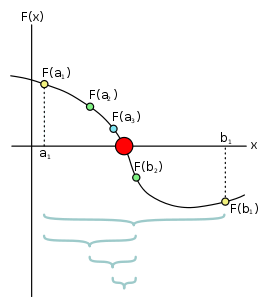

## 이진법 개념
##### -구간을 둘로 나누면 솔루션은 하나의 하위 구간 내에 존재함
##### -솔루션의 구간을 선택하고, 다시 반으로 쪼갬
##### -솔루션을 찾을 때까지 계속해서 반복한다.(원하는 정확도 내에서)

## 알고리즘
### 이분법의 절차는 다음과 같다.

#### 1. 시작 간격 선택 [a0, b0] 우리가 알고 있는 근은 (즉, f(a0)f(b0) < 0).
#### 2. 컴퓨팅 f(m0) 어디 m0 = (a0 + b0) / 2중간점이다.

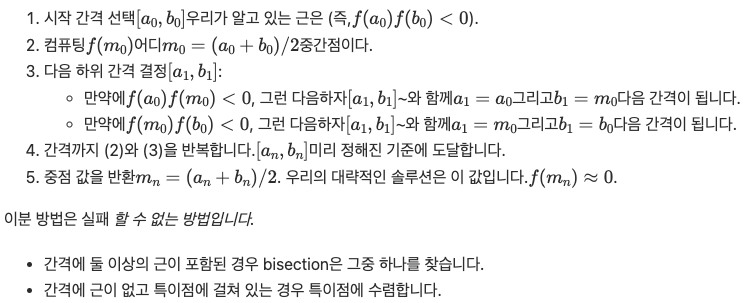

## 절대 오차

$$
\epsilon_{n + 1} = \epsilon_n/2
$$

#### 한번 반복 후 루트를 포함하는 범위가 2배 감소한다는 것이 알고리즘에서 분명하다.
#### $\epsilon $(원하는 종료 횟수,솔루션을 찾았을때 간격)과 $\epsilon_0(초기의 간격크기)$에 대한 식으로 정리하게 되면 
$$ n = log_2 \frac{\epsilon_0}{\epsilon} $$ 
이것이 허용 오차를 달성하는 데 필요한 반복 횟수이다. (이는 실제로 유도하면 나옴)
$$
|x_{\rm true} - x_n| \le \epsilon = \frac{\epsilon_0}{2^{n + 1}}
$$
그리고 이것을 x_true 즉, 정확한 해, 그리고 x_n은 n번 후 반복 후의 해의 사이 값은 $\epsilon$ 보다 같거나 작다. 


##### 추가 요인 $1/2$은 $n$ 반복 후 하위 구간의 중간점을 반환한다는 사실에서 비롯된다.
# (초기에 한번 1/2로 나눠주고 시작해서??이를 포함시키려고 n+1 하는듯??)

## 구현

###  for _ in range(n) 에서 _ 언더바의 의미
- 인터프리터(Interpreter)에서 마지막 값을 저장할 때
- 값을 무시하고 싶을 때 (흔히 “I don’t care"라고 부른다.)
- 변수나 함수명에 특별한 의미 또는 기능을 부여하고자 할 때
- 국제화(Internationalization, i18n)/지역화(Localization, l10n) 함수로써 사용할 때
- 숫자 리터럴값의 자릿수 구분을 위한 구분자로써 사용할 때


In [205]:
def bisection_by(f, a, b, n):
    a_n = a
    f_of_a_n = f(a_n) #f 함수에 a를 넣은 함수 값
    b_n = b
    f_of_b_n = f(b_n) #f 함수에 b를 넣은 함수 값
    
    #f: 해를 추정하고자 하는 방정식
    #a,b :interval, 간격, 즉 함수에서 [a, b]를 뜻함
    #x_n : n번째 구간의 중간점
    #- 만약 f(m-n) == 0인 경우 중간지점이 m-n = (a_n + b_n) / 2이라면, 이 솔루션을 반환
    #- 만약 f(a-n), f(b-n)의 모든 부호가 동일 --> 이등분 방법 실패를 반환.
    
    #validity check 타당한지 체크
    if f_of_a_n * f_of_b_n >= 0:
        print("Bisection method fails.")
        return None
    
    
    m_n = 0.5 * (a_n + b_n) #첫번째의 중간값.
    f_of_m_n = f(m_n) #중간 값을 넣은 함수 값.
    
    # iterations 반복
    for _ in range(n) : 
        #여기서 _의 의미는 i라고 생각해도 될듯. 
        #그냥 몇 번 반복했는지를 후에 마지막 값 저장하려고 쓰는 듯
        if f_of_m_n == 0: #즉 중간값의 함수 값이 0이 나오면 해를 찾은 거겠지.
            print("Found exact solution.")
            return m_n
        
        elif f_of_a_n * f_of_m_n < 0: 
            #만약 a를 넣은 값이 중간값과 곱했을때 음수이면, 그 사이이에 해가 있다.
            b_n = m_n #b값은 그러면 반으로 잘라서 m_n을 b_n으로 두어도 된다.
            f_of_b_n = f_of_m_n #마찬가지
            
        elif f_of_b_n * f_of_m_n < 0:
            a_n = m_n
            f_of_a_n = f_of_m_n
            
        else:
            print("Bisection method fails.")
            return None
        
        #다시 반으로 쪼개고, 함수값 넣어서 다시 부호를 체크한다.
        m_n = 0.5 * (a_n + b_n)
        f_of_m_n = f(m_n)
        
    return m_n
        

In [206]:
#f의 의미.
f = lambda x: x**3
a = 3
f(a)

27

In [207]:
# _ under bar의 의미.
n = 100
for _ in range(n):
    print(_)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


## 생각해볼 것??
- 모니터 기능을 제공하여 외부에서 반복을 모니터링 하는 것이 유용하다.
- 또한 중간 값을 관찰하여 반복을 종료할 시기를 결정하는 것이 유용하다.

# 이해가 안됨...

## bisection_while 을 정의해보자

In [208]:
def bisection_while(f, xinit, predicate):
    a_n, b_n = xinit 
    f_1st = f(a_n)
    
    #f: 해를 추정하고자 하는 방정식
    #xinit :interval, 간격, 즉 함수에서 [a, b]를 뜻함, 여기선 튜플로 들어감.
    #predicate : 호출 가능, 세 가지 인수를 사용하는 함수를 의미.
    # -i : 반복 횟수
    # -xy : 현재 반복에서 중간점과 함수 값의 쌍
    # -dx : x 값의 변경
    #그리고 boolean을 반환한다, True이면 검색이 계속되고 False이면 검색이 종료된다.
    
    #X_n : 숫자
    #이등분 방법으로 계산된 n번째 구간의 중간점, 초기간격은 a, b로 [a_0, b_0]가 결정됨.
    #위와 마찬가지로 (m_n) == 0인 경우 중간점 m_n = (a_n + b_n)/2이면 함수는 이 솔루션을 반환합니다.
    #만약 값 f(a_n), f(b_n), f(m_n)의 모든 부호가 동일하다면 반복하면 이등분 방법이 실패하고 없음을 반환합니다.
    
    #유효한지 체크
    if f(a_n) * f(b_n) >= 0:
        print("Bisection method fails.")
        return None
    

    i = 1
    x_mid = 0.5 * (a_n + b_n)
    f_mid = f(x_mid)
    
    #cuberoot2_approx = bisection_while(lambda x: x*x*x - 2, (1, 2), 
    #                             lambda i, xy, dx: abs(dx) > 1e-10)
    #lambda는 익명함수라고 이해하면 된다.
    
    #반복

    while predicate(i, (x_mid, f_mid), 0.5 * abs(a_n - b_n)):
        #만약 abs(dx) 값이 적절한 숫자 정도보다 작아질때 까지, 시작하라는 뜻
        #즉 dx 값이 e-10 보다 크면 계속하고, 작으면 멈추는 시스템.
        if f_1st * f_mid > 0: 
            #앞서 이 상황은 a_n과 b_n사이에 0값이 끼어있어야함. (유호체크를 통과했으니)
            #그리고 이 상황을 만족하는 경우는, 즉 a_n보다 해가 +방향에 있기에 
            #a_n을 mid로 잡고 +방향으로 1/2씩 좁혀가는 것.
            a_n = x_mid
            f_1st = f_mid

        else:
            b_n = x_mid 
            #b_n이 당겨짐 -방향으로
            #이때 f_1st는 안변해도 됨 
            #1. f_1st * f_mid 이 0보다 커지면, a_n이 움직이니 상관없고
            #2. f_1st * f_mid 이 여전히 같거나 작으면, b_n이 더 당겨지면 되기에
            
        i = i + 1
        x_mid = 0.5 * (a_n + b_n)
        f_mid = f(x_mid)
        #즉 a_n 과 b_n 간격을 계속해서 줄이주면서, x_mid를 적절하게 옮겨준다.
 
    return x_mid
    
    

# 운동
## 큐브루트
$\sqrt[3]{2}$ 근사치를 구하여
$$
x^3 - 2 = 0
$$
를 해결


In [209]:
cuberoot2_approx = bisection_while(lambda x: x*x*x - 2, (1, 2), 
                                   lambda i, asdf, dx: abs(dx) > 1e-10)
(cuberoot2_approx, abs(2**(1/3) - cuberoot2_approx))

(1.2599210498738103, 2.1062929178583545e-11)

##### asdf 자리에 뭘 넣어도 상관없는데, 저 자리의 의미는?? --> x,y의 값을 나타내는 (x,y) 튜플의 변수를 나타낸 것

# 황금 비율

황금비율은 다음과 같이 주어진다
$$
\phi = \frac{1 + \sqrt 5}{2} \approx 1.6180339887498948482
$$
그리고 그 솔루션은 이러하다.
$f(x) \equiv x^2 - x - 1 = 0$.

여기서 이를 이분법으로 구현해보자, $N = 25$ iterations on $[1, 2]$ to approximate $\phi$.

In [210]:
approx_phi = bisection_by(lambda x: x*(x - 1) - 1, 1, 2, 25)
approx_phi

1.618033990263939

$(2 - 1)/2^{26}$: 절대 오차는 이것 보다 작도록 보장 된다

In [211]:
error_bound = 2 ** (-26)
abs((1 + 5 ** 0.5) / 2 - approx_phi) < error_bound #앞의 공식에 의거하면

True

# 이를 시각화해보자

In [212]:
ix_pairs = []
iy_pairs = []
idx_pairs = []

def intercept(i, xy, dx):
    ix_pairs.append([i, xy[0]]) #i를 한번 돌렸을때 x의 값.
    iy_pairs.append([i, abs(xy[1])]) #i를 한번 돌렸을때 y의 값.
    idx_pairs.append([i, abs(dx)]) #i번 돌렸을때, 앱실론, 간격
    print(i, xy, dx) 
    return i <= 10
    #while구문을 끝낼 제한 조건에 해당함, return은 제한을 나타내면서
    #return이 될때 동안, i는 위의 def구문에 의해 i +1씩 더해지고 i = 11이 되면
    #intercept에서 false를 출력하면서 while 구문에도 false가 됨에 따라
    #bisection_while 구문도 멈추게 된다.

bisection_while(lambda x: x*(x - 1) - 1, (1, 2), intercept )

1 (1.5, -0.25) 0.5
2 (1.75, 0.3125) 0.25
3 (1.625, 0.015625) 0.125
4 (1.5625, -0.12109375) 0.0625
5 (1.59375, -0.0537109375) 0.03125
6 (1.609375, -0.019287109375) 0.015625
7 (1.6171875, -0.00189208984375) 0.0078125
8 (1.62109375, 0.0068511962890625) 0.00390625
9 (1.619140625, 0.002475738525390625) 0.001953125
10 (1.6181640625, 0.00029087066650390625) 0.0009765625
11 (1.61767578125, -0.0008008480072021484) 0.00048828125


1.61767578125

In [213]:
ix_pairs

[[1, 1.5],
 [2, 1.75],
 [3, 1.625],
 [4, 1.5625],
 [5, 1.59375],
 [6, 1.609375],
 [7, 1.6171875],
 [8, 1.62109375],
 [9, 1.619140625],
 [10, 1.6181640625],
 [11, 1.61767578125]]

In [214]:
print(*ix_pairs)

[1, 1.5] [2, 1.75] [3, 1.625] [4, 1.5625] [5, 1.59375] [6, 1.609375] [7, 1.6171875] [8, 1.62109375] [9, 1.619140625] [10, 1.6181640625] [11, 1.61767578125]


In [215]:
print(zip(*ix_pairs))

In [216]:
print(*zip(*ix_pairs)) #x,y plot에 놓을 수 있게 튜플로 각각 묶어준다.


(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11) (1.5, 1.75, 1.625, 1.5625, 1.59375, 1.609375, 1.6171875, 1.62109375, 1.619140625, 1.6181640625, 1.61767578125)


## zip과 *zip 의 이해

In [217]:
numbers = [[1,1.50001], [4,1.801] ,[8,1.91]]
letters = ['a', 'b', 'c', 'd']
upper_letters = ['A', 'B', 'C', 'D', 'E']
 
zipped = zip(numbers, letters, upper_letters) 
zipped = list(zipped)
print(zipped) #단순히 zip은 함수를 튜플로 묶어준다. 압축해준다고 생각


[([1, 1.50001], 'a', 'A'), ([4, 1.801], 'b', 'B'), ([8, 1.91], 'c', 'C')]


In [218]:
print(*zip(numbers,letters)) #numbers과 letters를 튜플로 묶어준다.
#이때 위와 다르게 하나의 꼴로 압축된 것을 볼 수 있다.

print(zip(*numbers)) #각각의 좌표를 (a)(b)꼴로 묶어준다.
print("-" * 10)
#튜플로 하나로 묶여있지만, 각각의 인수로 빠져나올 수 있다.
for i in zip(*numbers):
    print(i)

([1, 1.50001], 'a') ([4, 1.801], 'b') ([8, 1.91], 'c')
----------
(1, 4, 8)
(1.50001, 1.801, 1.91)


In [219]:
print(*zip(*numbers))

(1, 4, 8) (1.50001, 1.801, 1.91)


<function matplotlib.pyplot.show(close=None, block=None)>

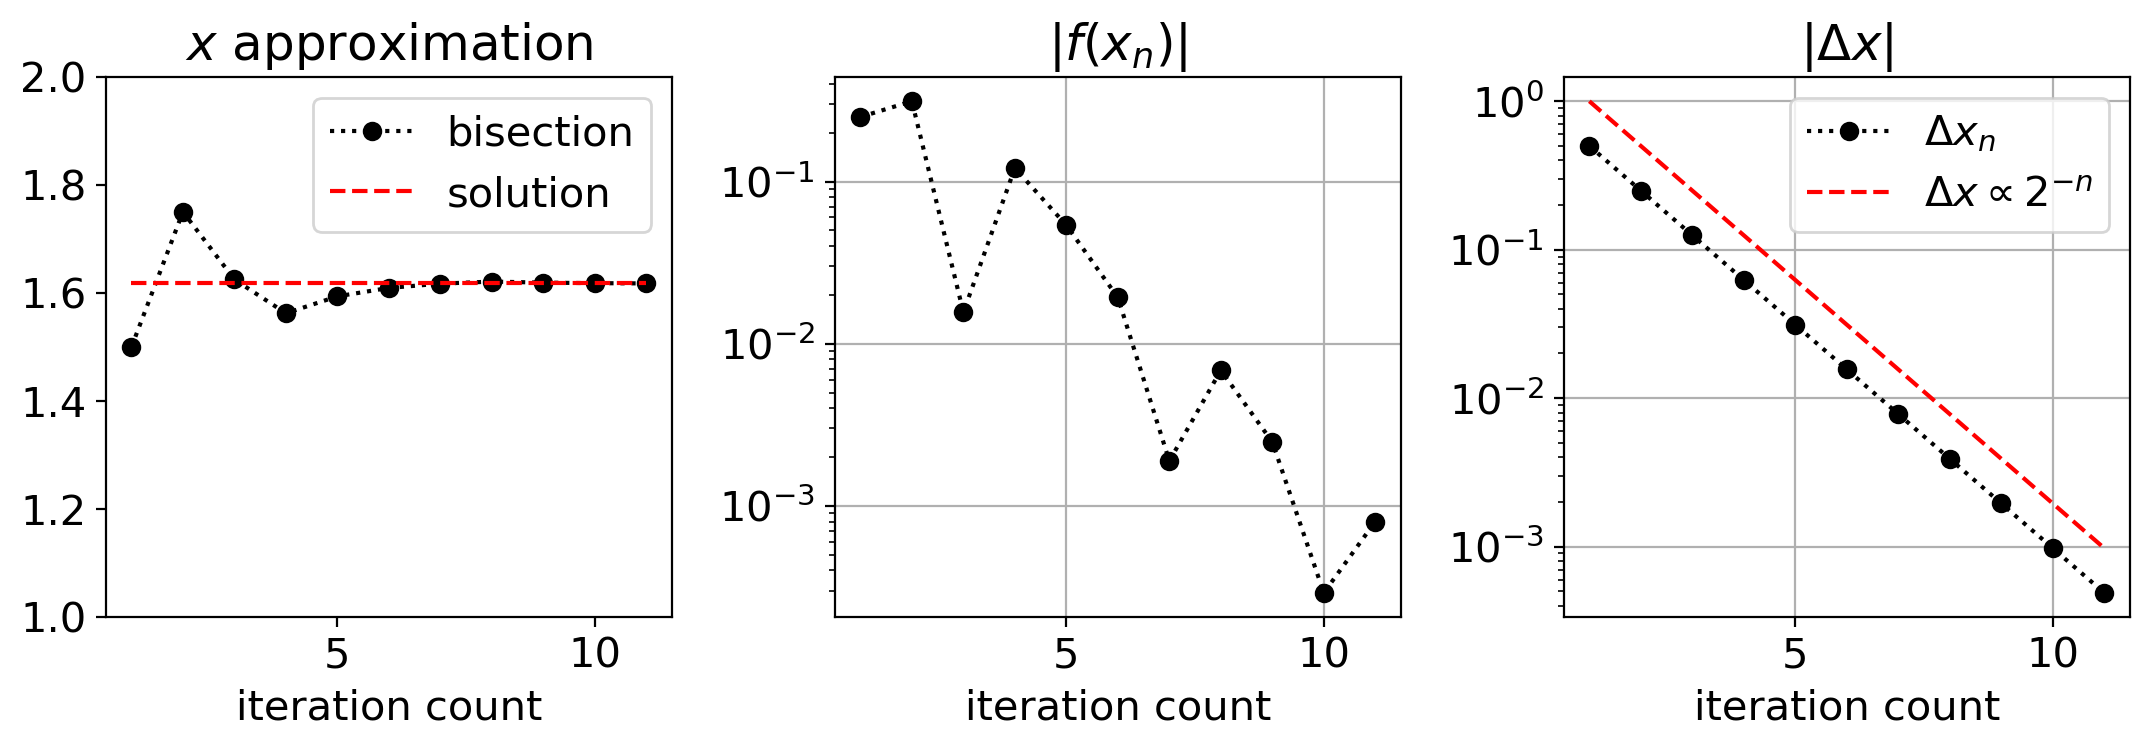

In [229]:
plt.figure(figsize=(11, 4))

plt.subplot(1, 3, 1)
plt.plot(*zip(*ix_pairs), 'o:k', label="bisection") 
#ix_pairs를 plot하기 쉽게 *zip(*행렬) 꼴을 이용한다.

plt.plot([1, len(ix_pairs)], (1 + 5 ** 0.5) / 2 * np.ones((2,)), '--r',
         label="solution")
#ix_pairs의 길이 만큼, 실제 솔루션이 어느정도 되는지를 보여주는 점선.
plt.title("$x$ approximation")
plt.xlabel("iteration count")
plt.ylim([1, 2])
plt.legend()



plt.subplot(1, 3, 2)
plt.semilogy(*zip(*iy_pairs), 'o:k')
plt.title("$|f(x_n)|$")
plt.xlabel("iteration count")
plt.grid()
#이 값은 결국 해를 찾는 거니 0에 수렵해야 함을 볼 수 있고
#이 때 한 칸씩 잠시 올라가는 이유는, 절반 자르는 과정에서 함수 값이 늘 수도, 줄어들 수도 있음
#이는 반 잘랐을때, 그 값의 f(x)이기에 함수에 따라 규칙적이게 잠시 늘었다가, 줄어든다.
#점진적으로는 계속 줄어들겠지, 원하는 0값이 되니까.

plt.subplot(1, 3, 3)
plt.semilogy(*zip(*idx_pairs), 'o:k', label="$\Delta x_n$")
plt.semilogy(*zip(*[(idx[0], 2/2**idx[0]) for idx in idx_pairs]),
             'r--', label="$\Delta x \propto 2^{-n}$")
plt.xlabel("iteration count")
plt.title("|$\Delta x$|")
plt.grid()
plt.legend()
#이 값은 앱실론, 값이 작을때 까지 우리가 선정하는 것.

plt.tight_layout()
plt.show

In [221]:
print([1, len(ix_pairs)])
print((1 + 5 ** 0.5) / 2 * np.ones((2,)))
np.ones((2,))

[1, 11]
[1.61803399 1.61803399]


array([1., 1.])

### 베셀 함수의 해를 찾아보자

$J_0(x) = 0$.
먼저 솔루션의 간격을 알아야 한다.


<function matplotlib.pyplot.show(close=None, block=None)>

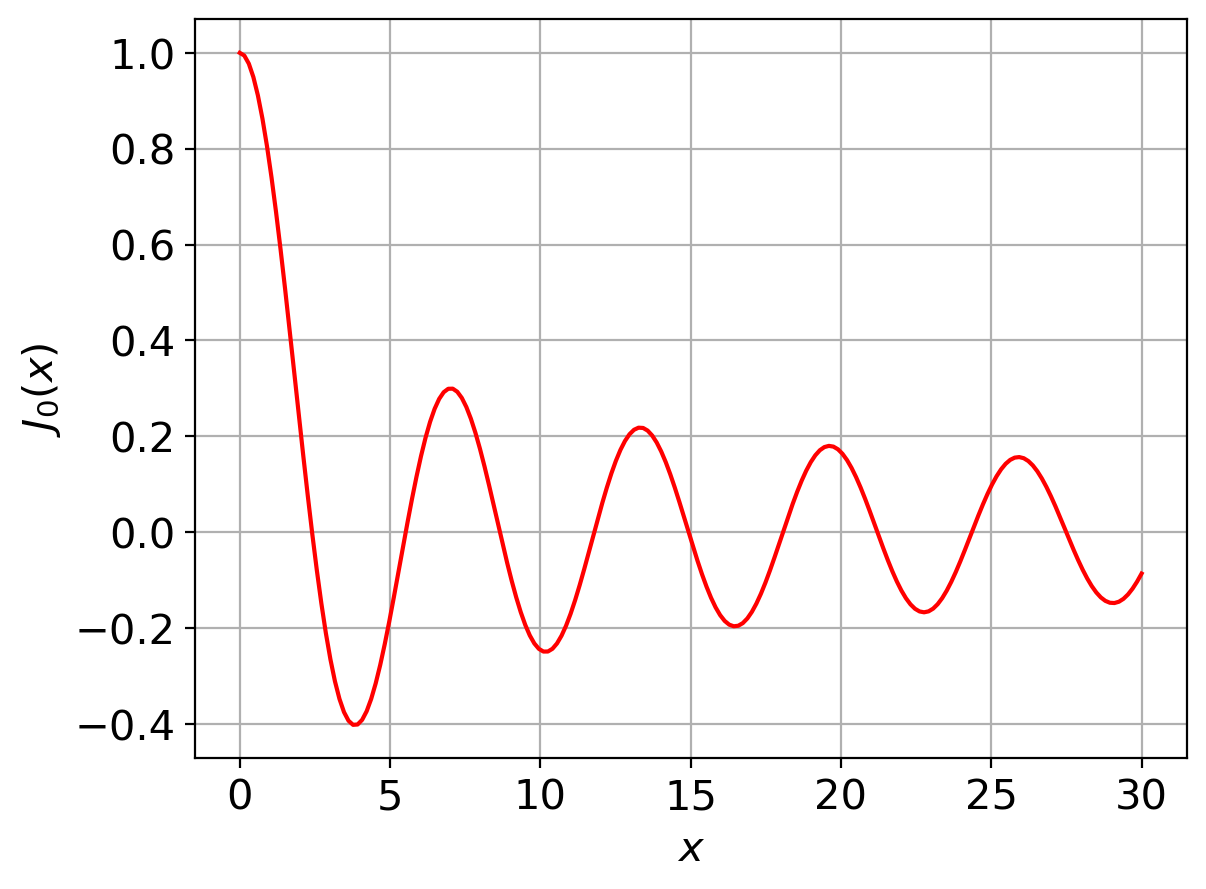

In [228]:
from scipy import special

x = np.linspace(0, 30, 200)
y = special.jn(0, x)

plt.figure()
plt.plot(x, y, '-r', label = "$J_0(x)$")
plt.xlabel("$x$")
plt.ylabel("$J_0(x)$")
plt.grid()
plt.show



위의 그림에서 첫 번째 해는 [0,5] 두번째는 ...이렇게 이분법으로 구현해보자

<function matplotlib.pyplot.show(close=None, block=None)>

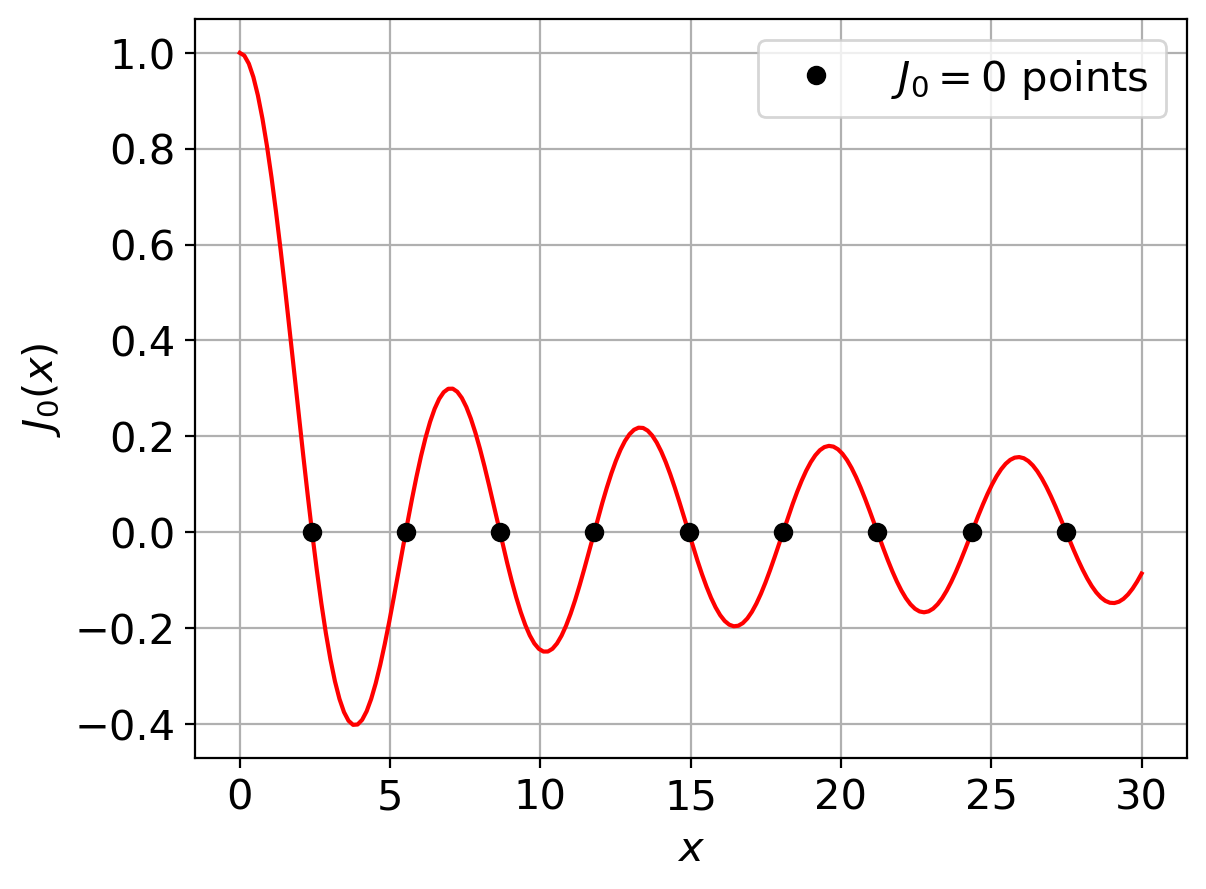

In [227]:
intervals = (0, 5, 7, 10, 13, 16, 20, 23, 25, 28)
x_zeros = [
    bisection_while(lambda x: special.jn(0, x), ab,
                    lambda i, xy, dx: abs(xy[1]) >= 1e-10)
    for ab in zip(intervals[:-1], intervals[1:])
]

plt.figure()
plt.plot(x, y, '-r')
plt.plot(x_zeros,np.zeros_like(x_zeros), 'ok',
         label="$J_0=0$ points")
plt.xlabel("$x$")
plt.ylabel("$J_0(x)$")
plt.grid()
plt.legend()
plt.show

해가 정확한 값에 얼마나 가까운지 비교해보자

In [224]:
abs_err = [abs(x - y) for x, y in zip(x_zeros, special.jn_zeros(0, len(x_zeros)))]
abs_err
#여기서 x는 zip에서 x_zeors(우리가 구한 해)
#y는 special.jn_zeros(0, 길이만큼) 실제 해를 구한 것.

[9.040945769811515e-11,
 2.2231017027252165e-10,
 1.3151790767551574e-10,
 2.849951385996974e-10,
 1.8107115806742513e-10,
 4.892726224170474e-10,
 4.579945311888878e-10,
 3.1183233772935637e-10,
 6.120259854469623e-10]

In [225]:
print(x_zeros)

[2.4048255576053634, 5.520078110508621, 8.65372791304253, 11.791534438729286, 14.930917708668858, 18.07106396742165, 21.211636629421264, 24.35247153043747, 27.493479132652283]


In [226]:
print(special.jn_zeros(0, 1))

[2.40482556]
